In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=fc27143906a8f051710f0ef595853ce7e9b0bc7690f1c860e4a823bef97b3070
  Stored in directory: c:\users\priyanshu sharma\appdata\local\pip\cache\wheels\a1\49\46\1b13a65d8da11238af9616b00fdde6d45b0f95d9291bac8452
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ef817e5bbd5fce6196950a099d3d5afff5514ed7f10a551f0aff942ba56bb11b
  Stored in directory: c:\users\priyanshu sharma\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [30]:
from PIL import Image

In [15]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [16]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [17]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [18]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [19]:
result = np.array(result)
result = result.reshape(139,2)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [22]:
y_train.shape

(111, 2)

In [23]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 7s 2s/step - loss: 41.6290 - val_loss: 118.4549
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 22.6794 - val_loss: 60.7308
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 14.1339 - val_loss: 68.3576
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 8.1724 - val_loss: 25.4823
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 3.2220 - val_loss: 12.8530
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 4.9955 - val_loss: 12.7242
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.6572 - val_loss: 27.3474
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 2.6246 - val_loss: 32.3391
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.9432 - val_loss: 30.1712
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.7902 - val_loss: 24.4694
Epoch 11/30
3/3 [==================

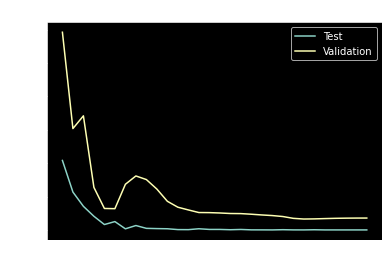

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [25]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


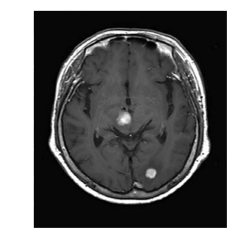

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r"brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


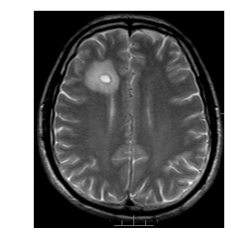

In [28]:
from matplotlib.pyplot import imshow
img = Image.open(r"brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))